In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SolarPrediction.csv to SolarPrediction.csv


In [6]:
df = pd.read_csv('SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [9]:
df.shape

(32686, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [11]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


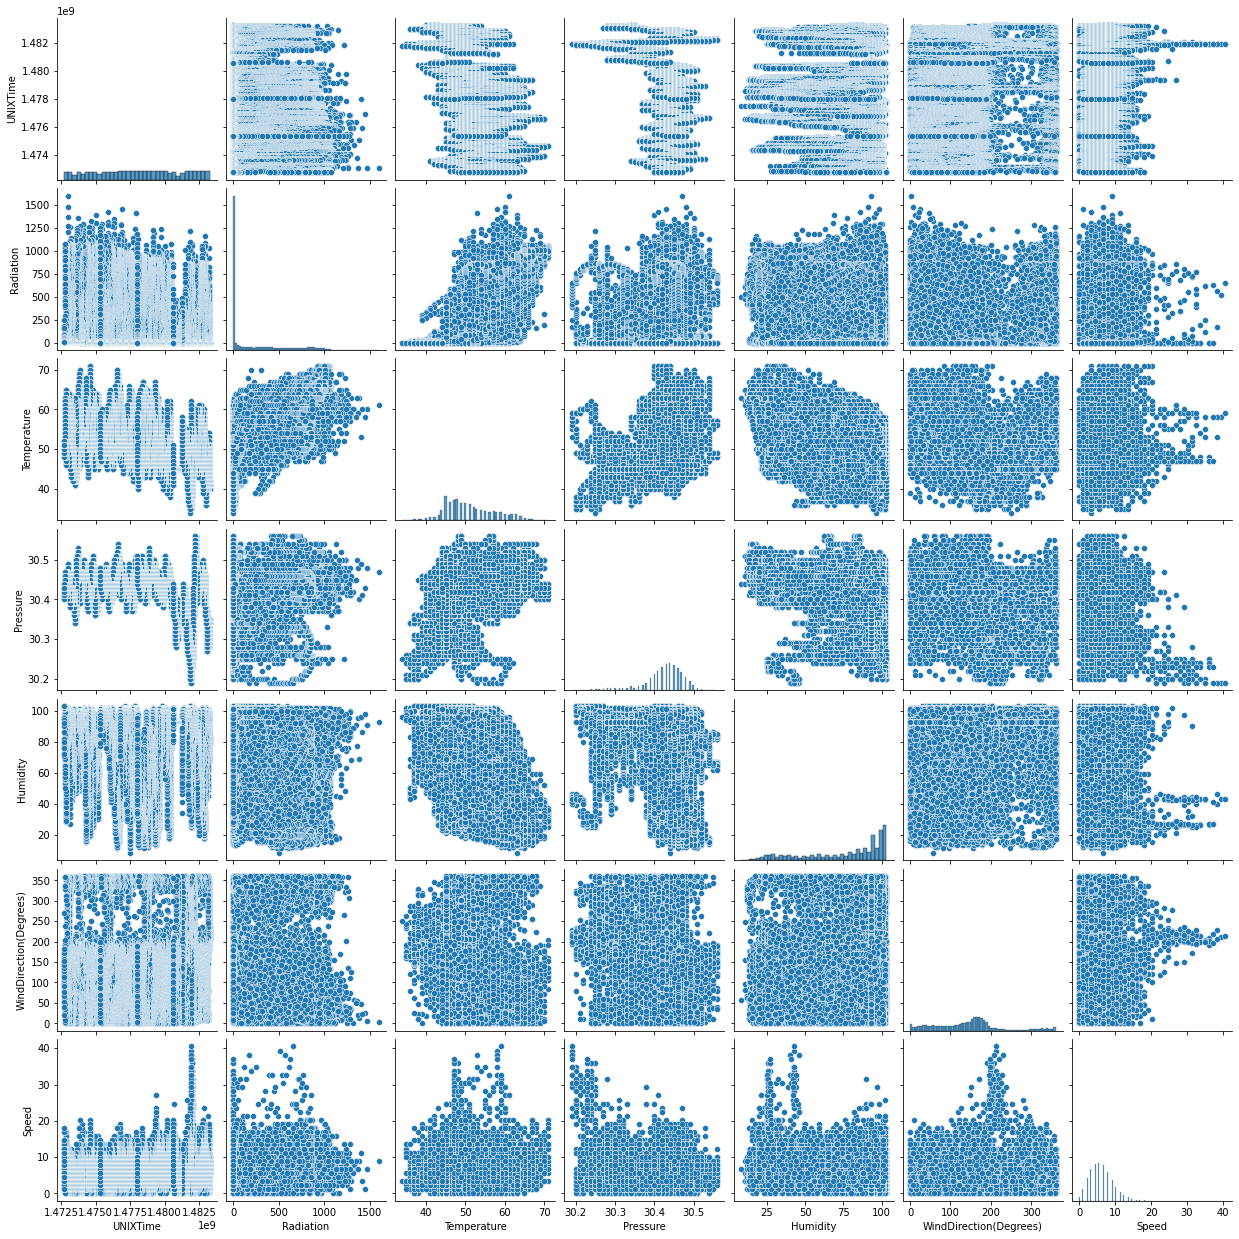

In [12]:
sns.pairplot(df)

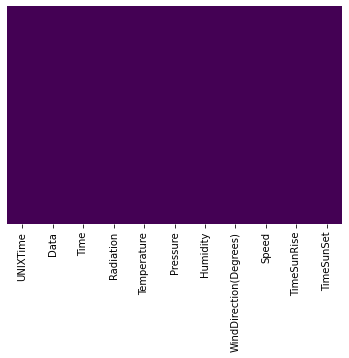

In [14]:
# we will check whether there is any missing values present in the data
sns.heatmap(df.isna(), yticklabels= False, cbar= False, cmap= 'viridis')

We see that there are no missing values present in the data

In [15]:
df[:5]

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


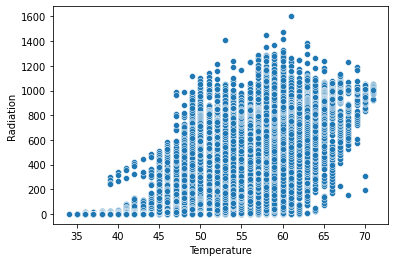

In [16]:
sns.scatterplot(x='Temperature', y='Radiation', data=df)

We see that when temperature is around 50 to 60 F, radiation is high

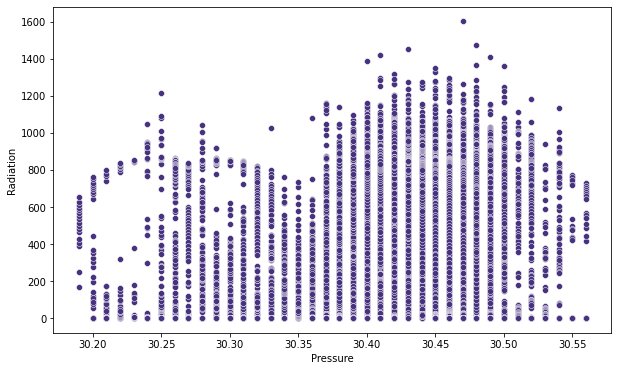

In [21]:
plt.figure(figsize=(10,6))
sns.set_palette('viridis')
sns.scatterplot(x='Pressure', y='Radiation', data=df)
# When Pressure is around 30.40 to 30.50 Radiation tends to be high

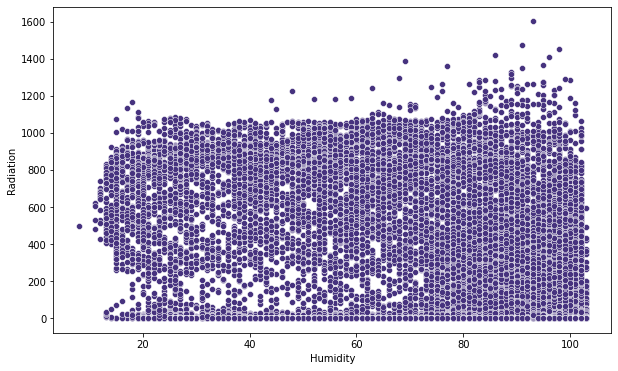

In [37]:
plt.figure(figsize=(10,6))
sns.set_palette('viridis')
sns.scatterplot(x='Humidity', y='Radiation', data=df)
# we see that humidity is constant from 20 to 80 and then we have some high radiation when Humidity is above 80

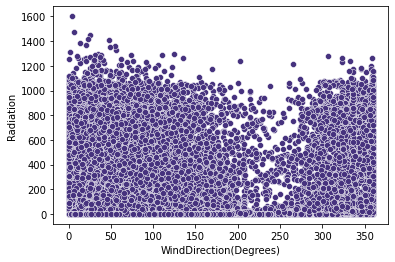

In [39]:
sns.scatterplot(x='WindDirection(Degrees)', y='Radiation', data=df)

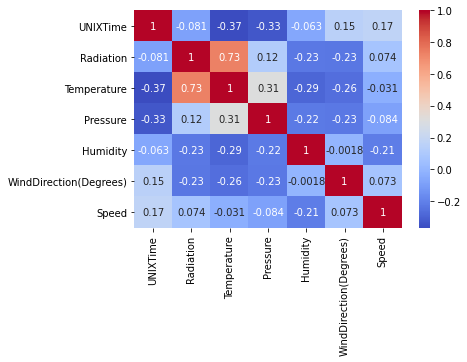

In [41]:
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')

Humidity and Wind direction are negatively correalted to Radiation

In [42]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [56]:
X = df[['Temperature', 'Pressure', 'Speed']]
X[:5]

,Temperature,Pressure,Speed
0,48,30.46,5.62
1,48,30.46,3.37
2,48,30.46,3.37
3,48,30.46,3.37
4,48,30.46,5.62


In [44]:
y =df['Radiation']
y[:5]

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
scaled = scaler.transform(X)

In [60]:
scaled_df = pd.DataFrame(scaled, columns= X.columns)

In [61]:
scaled_df[:5]

,Temperature,Pressure,Speed
0,-0.500439,0.678974,-0.178738
1,-0.500439,0.678974,-0.823359
2,-0.500439,0.678974,-0.823359
3,-0.500439,0.678974,-0.823359
4,-0.500439,0.678974,-0.178738


In [62]:
X = scaled_df
X[:5]

,Temperature,Pressure,Speed
0,-0.500439,0.678974,-0.178738
1,-0.500439,0.678974,-0.823359
2,-0.500439,0.678974,-0.823359
3,-0.500439,0.678974,-0.823359
4,-0.500439,0.678974,-0.178738


In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [64]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
pred = model.predict(X_test)

In [76]:
from sklearn import metrics
metrics.r2_score(y_test, pred)

0.5582763007866185

In [72]:
from sklearn.linear_model import SGDRegressor
mod = SGDRegressor()

In [74]:
mod.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [75]:
predict = mod.predict(X_test)

In [77]:
metrics.r2_score(y_test, predict)

0.5577622194599245